None


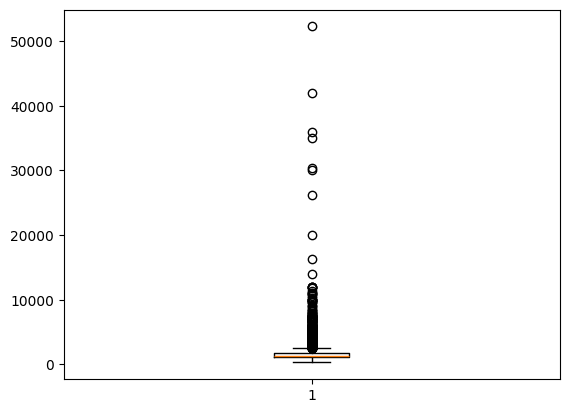

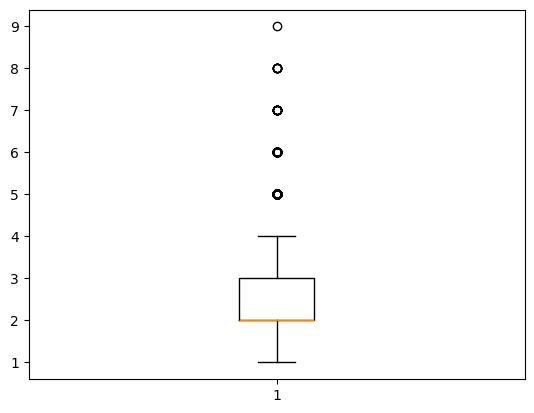

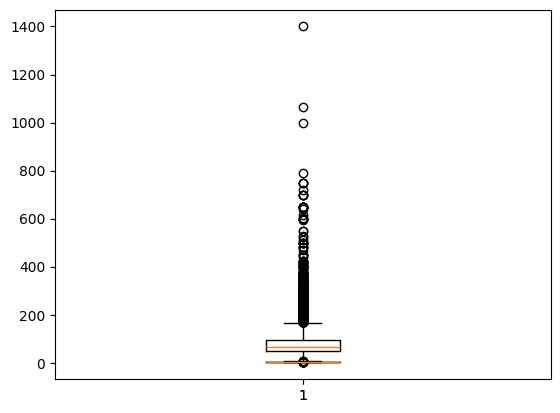

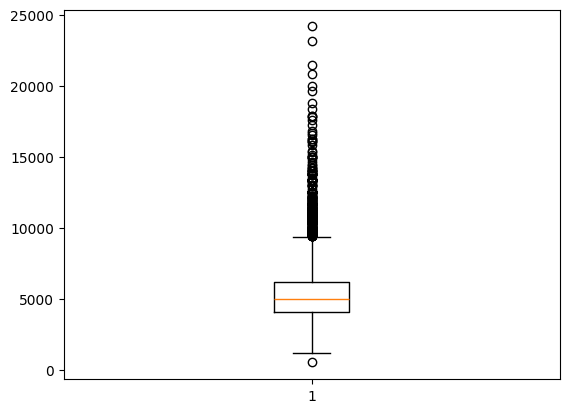

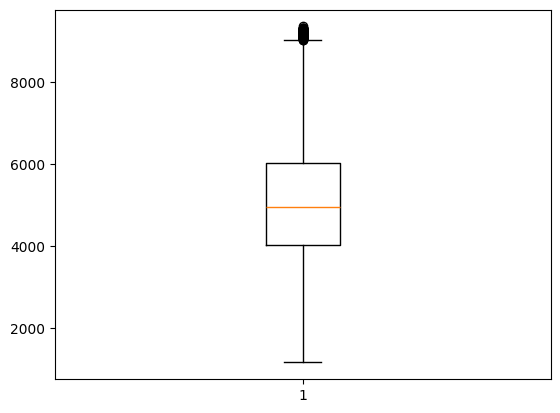

(2018,)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
# Supressing update warnings
warnings.filterwarnings ('ignore')

df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()
df1.shape
df1.columns
df1['area_type']
df1['area_type'].unique()
df1['area_type'].value_counts()

df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.shape
df2.isnull().sum()
df2.shape

df3 = df2.dropna()
df3.isnull().sum()
df3.shape
df3['size'].unique()

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()
df3.bhk.unique()
df3[df3.bhk>20]
df3.total_sqft.unique()

def is_float(x):
 try:
  float(x)
  return True
 except (ValueError, TypeError):
  return False

df3 [~df3 ['total_sqft'].apply(is_float)].head(10)

def convert_sqft_to_num(x):
 tokens = x.split('-')
 if len(tokens) == 2:
  try:
   return (float(tokens [0])+float(tokens[1]))/2
  except ValueError:
   return None
 try:
  return float(x)
 except ValueError:
  return None

result = convert_sqft_to_num('2100 2850')
print(result)

convert_sqft_to_num('34.46Sq. Meter')
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4

df4 = df4[df4.total_sqft.notnull()]
df4
df4.loc[30]

df5 = df4.copy()
df5 ['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

df5_stats = df5['price_per_sqft'].describe()
df5_stats

df5.to_csv("bhp.csv", index=False)

df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts (ascending=False)
location_stats

len(location_stats [location_stats>10])
len (location_stats)
len(location_stats [location_stats<=10])

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

len (df5.location.unique())
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len (df5.location.unique())
df5.head(10)
df5[df5.total_sqft/df5.bhk<300].head()
df5.shape

df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape
df6.columns

plt.boxplot(df6['total_sqft'])
plt.show()

Q1 = np.percentile(df6 [ 'total_sqft'], 25.) # 25th percentile
Q3 = np.percentile (df6 ['total_sqft'], 75.) # 75th percentile
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['total_sqft'] > ul].index.tolist()
lower_outliers = df6[df6['total_sqft'] < ll].index.tolist()
bad_indices = list(set (upper_outliers + lower_outliers))
drop = True
if drop:
 df6.drop(bad_indices, inplace=True, errors='ignore')

plt.boxplot(df6['bath'])
plt.show()

Q1 = np.percentile (df6['bath'], 25.) # 25th percentile
Q3 = np.percentile (df6 ['bath'], 75.) # 75th percentile
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['bath'] > ul].index.tolist()
lower_outliers = df6[df6['bath'] < ll].index.tolist()
bad_indices = list(set (upper_outliers + lower_outliers))
drop = True
if drop:
 df6.drop(bad_indices, inplace=True, errors='ignore')
 plt.show()
 
plt.boxplot(df6['price'])

Q1 = np.percentile (df6['price'], 25.) # 25th percentile
Q3 = np.percentile (df6['price'], 75.) # 75th percentile
IQR = Q3-Q1 #Interquartile Range
ll = Q1-(1.5*IQR)
ul = Q3+(1.5*IQR)
upper_outliers = df6[df6['price'] > ul].index.tolist()
lower_outliers = df6[df6['price'] < ll].index.tolist()
bad_indices = list(set (upper_outliers + lower_outliers))
drop = True
if drop:
 df6.drop(bad_indices, inplace=True, errors='ignore')

plt.boxplot(df6['bhk'])
plt.show()

Q1 = np.percentile (df6['bhk'], 25.) # 25th percentile
Q3 = np.percentile (df6 ['bhk'], 75.) # 75th percentile
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['bhk'] > ul].index.tolist()
lower_outliers = df6 [df6 ['bhk'] < ll].index.tolist()
bad_indices = list(set (upper_outliers + lower_outliers))
drop = True
if drop:
 df6.drop(bad_indices, inplace=True, errors='ignore')

plt.boxplot(df6['price_per_sqft'])
plt.show()

Q1 = np.percentile (df6 ['price_per_sqft'], 25.) # 25th percentile
Q3 = np.percentile (df6 ['price_per_sqft'], 75.) # 75th percentile
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['price_per_sqft'] > ul].index.tolist()
lower_outliers = df6[df6['price_per_sqft'] < ll].index.tolist()
bad_indices = list(set (upper_outliers + lower_outliers))
drop = True
if drop:
 df6.drop(bad_indices, inplace=True, errors='ignore')

plt.boxplot(df6['price_per_sqft'])
plt.show()

df6.shape

X = df6.drop(['price'], axis='columns')
X.head (3)
X.shape

y = df6.price
y.head(3)
len(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10)
X_train.shape
y_train.shape
X_test.shape
y_test.shape